In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
price_Sun=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第14章/超日太阳股票收盘价（2012年8月至2014年2月）.xlsx',
                       sheet_name="Sheet1",header=0,index_col=0)

In [3]:
return_Sun=np.log(price_Sun/price_Sun.shift(1))

In [4]:
sigma_Sun=np.sqrt(252)*np.std(return_Sun) #计算股票年化波动率
sigma_Sun=float(sigma_Sun) #转换为浮点型数据
print('超日太阳股票收益率的年化波动率',round(sigma_Sun,4))

超日太阳股票收益率的年化波动率 0.4238


C:\Users\jay\AppData\Local\Temp\ipykernel_18212\2752325827.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma_Sun=float(sigma_Sun) #转换为浮点型数据


In [5]:
equity=21.85 #2014年2月19日股票总市值（亿元）
debt=63.90 #2013年9月末公司债金额（亿元）
tenor=1 #z债券期限为1年
rate=0.050001 #2024年2月19日1年前Shibor（无风险收益率）

In [6]:
def f(x): #通过自定义一个函数计算企业价值和企业价值的年化波动率
    from numpy import exp,log,sqrt
    from scipy.stats import norm
    V,sigma_V=x #设定两个变量分别是当前企业价值和企业价值的年化波动率
    d1=(log(V/debt)+(rate+pow(sigma_V,2)/2)*tenor)/(sigma_V*sqrt(tenor)) #计算参数d1
    d2=d1-sigma_V*sqrt(tenor)
    eq1=V*norm.cdf(d1)-debt*exp(-rate*tenor)*norm.cdf(d2)-equity
    eq2=sigma_Sun*equity-norm.cdf(d1)*sigma_V*V
    return [eq1,eq2]

In [7]:
import scipy.optimize as sco

In [8]:
result=sco.fsolve(func=f,x0=[80,0.5]) #设定初始值分别是企业价值80亿元和企业价值的年化波动率50%

In [9]:
print('计算得到2014年2月19日超日太阳的企业价值（亿元）',round(result[0],4))
print('计算得到超日太阳企业价值的年化波动率',round(result[-1],4))

计算得到2014年2月19日超日太阳的企业价值（亿元） 82.6259
计算得到超日太阳企业价值的年化波动率 0.1124


In [10]:
def PD_Merton(E,D,V,sigma,r,T):
    '''定义一个运用默顿模型计算企业违约概率的函数
    E:代表当前的股票市值（亿元）
    D:代表债务本金（亿元）
    V:代表当前的企业价值（亿元）
    sigma:代表企业价值的年化波动率
    r:代表无风险收益率
    T:代表债务的期限'''
    from numpy import log,sqrt
    from scipy.stats import norm
    d1=(log(V/D)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    PD=norm.cdf(-d2)
    return PD

In [11]:
PD_Sun=PD_Merton(E=equity,D=debt,V=result[0],sigma=result[-1],r=rate,T=tenor) #计算违约概率

In [12]:
print('2014年2月19日超日太阳的违约概率',round(PD_Sun,6))

2014年2月19日超日太阳的违约概率 0.003725


In [13]:
equity_new=70.75 #2011年12月30日股票总市值（亿元）
debt_new=28.02 #2011年9月末负债金额（亿元）
rate_new=0.052378 #2011年12月30日1年期Shibor
sigma_new=0.4654 #股票的年化波动率

In [14]:
def g(x): #重新定义一个函数用于计算企业价值和企业价值的年化波动率
    from numpy import exp,log,sqrt
    from scipy.stats import norm
    V,sigma_V=x
    d1=(log(V/debt_new)+(rate_new+pow(sigma_V,2)/2)*tenor)/(sigma_V*sqrt(tenor))
    d2=d1-sigma_V*sqrt(tenor)
    eq1=V*norm.cdf(d1)-debt_new*exp(-rate_new*tenor)*norm.cdf(d2)-equity_new
    eq2=sigma_new*equity_new-norm.cdf(d1)*sigma_V*V
    return [eq1,eq2]

In [15]:
result_new=sco.fsolve(func=g,x0=[80,0.5]) #设定初始值分别是企业价值80亿元和企业价值的年化波动率50%
print('2011年12月30日超日太阳的企业价值（亿元）',round(result_new[0],4))
print('超日太阳企业价值的年化波动率',round(result_new[-1],4))

2011年12月30日超日太阳的企业价值（亿元） 97.3399
超日太阳企业价值的年化波动率 0.3383


In [16]:
PD_Sun_new=PD_Merton(E=equity_new,D=debt_new,V=result_new[0],sigma=result_new[-1],r=rate_new,T=tenor)
print('2011年12月30日超日太阳的违约概率',round(PD_Sun_new,6))

2011年12月30日超日太阳的违约概率 0.000123


In [17]:
M=PD_Sun/PD_Sun_new
print('2014年2月19日违约概率与2011年末违约概率的倍数',round(M,2))

2014年2月19日违约概率与2011年末违约概率的倍数 30.35


In [18]:
data_CB=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第14章/可转换债券数量和存续金额（2010年至2020年）.xlsx',
                     sheet_name="Sheet1",header=0,index_col=0)

Text(0, 0.5, '数量或金额')

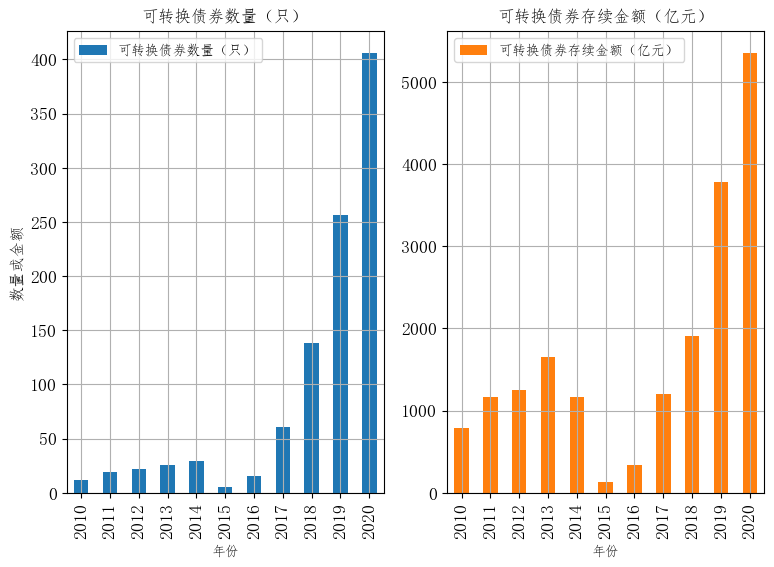

In [19]:
data_CB.plot(kind='bar',subplots=True,layout=(1,2),figsize=(9,6),grid=True,fontsize=13)
plt.subplot(1,2,1)
plt.ylabel(u'数量或金额',fontsize=11)

In [26]:
def value_CB(S,sigma,par,X,Lambda,r,R,Q2,T,N):
    '''定义一个运用N步二叉树模型计算可转换债券（可转债）价值的函数，同时假定可转债是一份零息债券
    S:代表股票的初始价格
    sigma:代表股票收益率的年化波动率
    par:代表可转债本金
    X:代表1份可转债转换为股票的股数（转股比例）
    Lambda:代表连续复利的年化违约概率
    r:代表连续复利的无风险收益率
    R:代表可转债违约时的回收率
    Q2:代表可转债的赎回价格
    T:代表可转债的期限（年）
    N:代表二叉树模型的步数'''
    #第一步，计算相关参数
    t=T/N
    u=np.exp(np.sqrt((pow(sigma,2)-Lambda)*t))
    d=1/u
    Pu=(np.exp(r*t)-d*np.exp(-Lambda*t))/(u-d)
    Pd=(u*np.exp(-Lambda*t)-np.exp(r*t))/(u-d)
    P_default=1-np.exp(-Lambda*t) #计算违约的概率
    D_value=par*R #可转债违约时的回收价值
    CB_matrix=np.zeros((N+1,N+1))
    #第二步，计算可转债到期时节点的股份与债券价格
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list) #计算可转债到期时节点的股价
    Q1=par
    Q3=X*S_end
    CB_matrix[:,-1]=np.maximum(np.minimum(Q1,Q2),Q3)
    #第三步，计算可转债非到期时节点的股价与债券价值
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        Q1=np.exp(-r*t)*(Pu*CB_matrix[:i+1,i+1]+Pd*CB_matrix[1:i+2,i+1]+P_default*D_value)
        Q3=X*Si
        CB_matrix[:i+1,i]=np.maximum(np.minimum(Q1,Q2),Q3)
    V0=CB_matrix[0,0]
    return V0

In [27]:
tenor=9/12 #可转换债券的期限
step1=3 #二叉树模型的步数为3步

In [28]:
S0=50 #股票的初始价格
sigma_A=0.2 #股票收益率的年化波动率
par_CB=100 #可转换债券的本金
share=2 #每份可转换债券转换为股票的数量

In [29]:
Lambda_A=0.01 #连续复利的年化违约概率
rate=0.05 #连续复利的无风险收益率
R_A=0.4 #违约回收率
Q2_A=110 #可转换债券的赎回价格

In [30]:
V1_CB=value_CB(S=S0,sigma=sigma_A,par=par_CB,X=share,Lambda=Lambda_A,r=rate,R=R_A,Q2=Q2_A,T=tenor,N=step1)
print('运用三步二叉树模型计算可转换债券初始价值',round(V1_CB,4))

运用三步二叉树模型计算可转换债券初始价值 104.2012


In [31]:
step2=100

In [32]:
V2_CB=value_CB(S=S0,sigma=sigma_A,par=par_CB,X=share,Lambda=Lambda_A,r=rate,R=R_A,Q2=Q2_A,T=tenor,N=step2)
print('运用100步二叉树模型计算可转换债券初始价值',round(V2_CB,4))

运用100步二叉树模型计算可转换债券初始价值 103.69


In [34]:
step3=300

In [35]:
V3_CB=value_CB(S=S0,sigma=sigma_A,par=par_CB,X=share,Lambda=Lambda_A,r=rate,R=R_A,Q2=Q2_A,T=tenor,N=step3)
print('运用300步二叉树模型计算可转换债券初始价值',round(V3_CB,4))

运用300步二叉树模型计算可转换债券初始价值 103.5598


In [36]:
def Black_model(F,K,sigma,r,T,typ):
    '''定义一个运用布莱克模型计算欧式期货期权价格的函数
    F:代表标的期货合约的当前价格
    K:代表期货期权的行权价格
    sigma:代表期货收益率的年化波动率
    r:代表连续复利的无风险收益率
    T:代表期货期权的剩余期限（年）
    typ:代表期货期权类型'''
    from numpy import exp,log,sqrt
    from scipy.stats import norm
    d1=(log(F/K)+pow(sigma,2)*T/2)/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    if typ=='call':
        price=exp(-r*T)*(F*norm.cdf(d1)-K*norm.cdf(d2))
    else:
        price=exp(-r*T)*(K*norm.cdf(-d2)-F*norm.cdf(-d1))
    return price

In [37]:
price_AU2012=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第14章/黄金期货AU2012合约结算价（2019年11月18日至2020年9月11日）.xlsx',
                          sheet_name="Sheet1",header=0,index_col=0)

In [38]:
return_AU2012=np.log(price_AU2012/price_AU2012.shift(1))

In [39]:
Sigma_AU2012=np.sqrt(252)*np.std(return_AU2012)
Sigma_AU2012=float(Sigma_AU2012)
print('黄金期货AU2012合约收益率的年化波动率',round(Sigma_AU2012,4))

黄金期货AU2012合约收益率的年化波动率 0.1757


C:\Users\jay\AppData\Local\Temp\ipykernel_18212\3225051020.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Sigma_AU2012=float(Sigma_AU2012)


In [40]:
import datetime as dt

In [41]:
t0=dt.datetime(2020,9,11)
t1=dt.datetime(2020,11,24)
tenor=(t1-t0).days/365

In [42]:
strike=380 #期货期权的行权价格
shibor_Sep11=0.02697 #2020年9月11日的无风险收益率
price_Sep11=420.36 #2020年9月11日期货结算价

In [43]:
price_call=Black_model(F=price_Sep11,K=strike,sigma=Sigma_AU2012,r=shibor_Sep11,T=tenor,typ='call')
price_put=Black_model(F=price_Sep11,K=strike,sigma=Sigma_AU2012,r=shibor_Sep11,T=tenor,typ='put')
print('2020年9月11日黄金2012购380期权合约（看涨期货期权）的价格',round(price_call,4))
print('2020年9月11日黄金2012沽380期权合约（看跌期货期权）的价格',round(price_put,4))

2020年9月11日黄金2012购380期权合约（看涨期货期权）的价格 41.645
2020年9月11日黄金2012沽380期权合约（看跌期货期权）的价格 1.5051


In [45]:
def FutOption_call_Amer(F,K,sigma,r,T,N):
    '''定义运用N步二叉树模型计算美式看涨期货期权价值的函数
    F:代表标的期货合约的当前价格
    K:代表期货期权的行权价格
    sigma:代表标的期货收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期货期权的期限（年）
    N:代表二叉树模型的步数'''
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(1-d)/(u-d)
    call_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1)
    F_end=F*pow(u,N-N_list)*pow(d,N_list)
    call_matrix[:,-1]=np.maximum(F_end-K,0)
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Fi=F*pow(u,i-j_list)*pow(d,j_list)
        call_strike=np.maximum(Fi-K,0)
        call_nostrike=np.exp(-r*t)*(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
    call_begin=call_matrix[0,0]
    return call_begin

In [54]:
def FutOption_put_Amer(F,K,sigma,r,T,N):
    '''定义运用N步二叉树模型计算美式看跌期货期权价值的函数
    F:代表标的期货合约的当前价格
    K:代表期货期权的行权价格
    sigma:代表标的期货收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期货期权的期限（年）
    N:代表二叉树模型的步数'''
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(1-d)/(u-d)
    put_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1)
    F_end=F*pow(u,N-N_list)*pow(d,N_list)
    put_matrix[:,-1]=np.maximum(K-F_end,0)
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Fi=F*pow(u,i-j_list)*pow(d,j_list)
        put_strike=np.maximum(K-Fi,0)
        put_nostrike=np.exp(-r*t)*(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
    put_begin=put_matrix[0,0]
    return put_begin

In [55]:
price_M2103=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第14章/豆粕期货2103合约结算价（2020年3月16日至11月5日）.xlsx',
                         sheet_name="Sheet1",header=0,index_col=0)

In [56]:
return_M2103=np.log(price_M2103/price_M2103.shift(1))

In [57]:
sigma_M2103=np.sqrt(252)*np.std(return_M2103)
sigma_M2103=float(sigma_M2103)
print('豆粕期货M2103合约收益率的年化波动率',round(sigma_M2103,4))

豆粕期货M2103合约收益率的年化波动率 0.1285


C:\Users\jay\AppData\Local\Temp\ipykernel_18212\501861378.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma_M2103=float(sigma_M2103)


In [58]:
T_3M=3/12
strike=3000
shibor_Nov5=0.02996
price_Nov5=3221
step=100

In [59]:
value_Amercall=FutOption_call_Amer(F=price_Nov5,K=strike,sigma=sigma_M2103,r=shibor_Nov5,T=T_3M,N=step)
value_Amerput=FutOption_put_Amer(F=price_Nov5,K=strike,sigma=sigma_M2103,r=shibor_Nov5,T=T_3M,N=step)

In [60]:
print('2020年11月5日豆粕2013购3000期权合约（美式看涨）的价值',round(value_Amercall,4))
print('2020年11月5日豆粕2013沽3000期权合约（美式看跌）的价值',round(value_Amerput,4))

2020年11月5日豆粕2013购3000期权合约（美式看涨）的价值 233.4664
2020年11月5日豆粕2013沽3000期权合约（美式看跌）的价值 13.5038


In [77]:
def caplet(L,R,F,Rk,sigma,t1,t2):
    '''定义一个计算利率上限单元价值的函数
    L:代表利率上限单元的本金，也就是利率上限期权的本金
    R:代表连续复利的无风险收益率
    F:代表初始0时刻观察到的从ti时刻至ti+1时刻期间的远期利率
    Rk:代表上限利率（行权价格）
    t1:代表ti时刻，以年为单位
    t2:代表ti+1时刻，以年为单位'''
    from numpy import exp,log,sqrt
    from scipy.stats import norm
    d1=(log(F/Rk)+0.5*pow(sigma,2)*t1)/(sigma*sqrt(t1))
    d2=d1-sigma*sqrt(t1)
    tau=t2-t1
    value=L*tau*exp(-R*t2)*(F*norm.cdf(d1)-Rk*norm.cdf(d2))
    return value

In [78]:
shibor_list=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第14章/Shibor利率（2019年1月至2020年3月20日）.xlsx',
                         sheet_name="Sheet1",header=0,index_col=0)

In [79]:
shibor_list.columns #查看列明

Index(['SHIBOR(3M)', 'SHIBOR(6M)', 'SHIBOR(9M)', 'SHIBOR(12M)'], dtype='object')

In [80]:
def Rf(R1,R2,T1,T2):
    '''定义一个计算远期利率的函数
    R1:表示对应期限为T1的零息利率
    R2:笔试对应期限为T2的零息利率
    T1:表示对应于零息利率R1的期限长度（年）
    T2:表示对应于零息利率R2的期限长度（年）'''
    forward_rate=R2+(R2-R1)*T1/(T2-T1) #计算远期利率
    return forward_rate

In [81]:
FR1_list=Rf(R1=shibor_list['SHIBOR(3M)'],R2=shibor_list['SHIBOR(6M)'],T1=3/12,T2=6/12) #3个月后的远期3个月期Shibor
FR2_list=Rf(R1=shibor_list['SHIBOR(6M)'],R2=shibor_list['SHIBOR(9M)'],T1=6/12,T2=9/12) #6个月后的远期3个月期Shibor
FR3_list=Rf(R1=shibor_list['SHIBOR(9M)'],R2=shibor_list['SHIBOR(12M)'],T1=9/12,T2=12/12) #9个月后的远期3个月期Shibor

In [82]:
return_FR1=np.log(FR1_list/FR1_list.shift(1))
return_FR2=np.log(FR2_list/FR2_list.shift(1))
return_FR3=np.log(FR3_list/FR3_list.shift(1))

In [83]:
sigma_FR1=np.sqrt(252)*return_FR1.std()
sigma_FR2=np.sqrt(252)*return_FR2.std()
sigma_FR3=np.sqrt(252)*return_FR3.std()

In [84]:
print('3个月后的远期3个月Shibor的年化波动率',round(sigma_FR1,6))
print('6个月后的远期3个月Shibor的年化波动率',round(sigma_FR2,6))
print('9个月后的远期3个月Shibor的年化波动率',round(sigma_FR3,6))

3个月后的远期3个月Shibor的年化波动率 0.064905
6个月后的远期3个月Shibor的年化波动率 0.073253
9个月后的远期3个月Shibor的年化波动率 0.081398


In [85]:
FR1_Mar20=FR1_list[-1]
FR2_Mar20=FR2_list[-1]
FR3_Mar20=FR3_list[-1]

In [86]:
R_6M=0.017049
R_9M=0.018499
R_12M=0.018682

In [87]:
par=1e8
cap_rate=0.022 #上限利率

In [88]:
caplet1=caplet(L=par,R=R_6M,F=FR1_Mar20,Rk=cap_rate,sigma=sigma_FR1,t1=3/12,t2=6/12)
caplet2=caplet(L=par,R=R_9M,F=FR2_Mar20,Rk=cap_rate,sigma=sigma_FR2,t1=6/12,t2=9/12)
caplet3=caplet(L=par,R=R_12M,F=FR3_Mar20,Rk=cap_rate,sigma=sigma_FR3,t1=9/12,t2=12/12)

In [89]:
print('利率重置日2020年6月20日、收益支付日2020年9月20日的利率上限单元价值',round(caplet1,2))
print('利率重置日2020年9月20日、收益支付日2020年12月20日的利率上限单元价值',round(caplet2,2))
print('利率重置日2020年12月20日、收益支付日2021年3月20日的利率上限单元价值',round(caplet3,2))

利率重置日2020年6月20日、收益支付日2020年9月20日的利率上限单元价值 37081.21
利率重置日2020年9月20日、收益支付日2020年12月20日的利率上限单元价值 96163.37
利率重置日2020年12月20日、收益支付日2021年3月20日的利率上限单元价值 129080.1


In [90]:
cap=caplet1+caplet2+caplet3 #设置利率上限期权的价值
print('2020年3月20日利率上限期权的价值',round(cap,2))

2020年3月20日利率上限期权的价值 262324.68


In [91]:
def floorlet(L,R,F,Rk,sigma,t1,t2):
    '''定义一个计算利率下限单元价值的函数'''
    from numpy import exp,log,sqrt
    from scipy.stats import norm
    d1=(log(F/Rk)+pow(sigma,2)*t1/2)/(sigma*sqrt(t1))
    d2=d1-sigma*sqrt(t1)
    tau=t2-t1
    value=L*tau*exp(-R*t2)*(Rk*norm.cdf(-d2)-F*norm.cdf(-d1))
    return value

In [92]:
floor_rate=0.025 #下限利率

In [93]:
floorlet1=floorlet(L=par,R=R_6M,F=FR1_Mar20,Rk=floor_rate,sigma=sigma_FR1,t1=3/12,t2=6/12)
floorlet2=floorlet(L=par,R=R_9M,F=FR2_Mar20,Rk=floor_rate,sigma=sigma_FR2,t1=6/12,t2=9/12)
floorlet3=floorlet(L=par,R=R_12M,F=FR3_Mar20,Rk=floor_rate,sigma=sigma_FR3,t1=9/12,t2=12/12)

In [94]:
print('利率重置日2020年6月20日、收益支付日2020年9月20日的利率下限单元的价值',round(floorlet1,2))
print('利率重置日2020年9月20日、收益支付日2020年12月20日的利率下限单元的价值',round(floorlet2,2))
print('利率重置日2020年12月20日、收益支付日2021年3月20日的利率下限单元的价值',round(floorlet3,2))

利率重置日2020年6月20日、收益支付日2020年9月20日的利率下限单元的价值 37634.23
利率重置日2020年9月20日、收益支付日2020年12月20日的利率下限单元的价值 4779.06
利率重置日2020年12月20日、收益支付日2021年3月20日的利率下限单元的价值 2391.65


In [95]:
floor=floorlet1+floorlet2+floorlet3 #计算利率下限期权的价值
print('2020年3月20日利率下限期权的价值',round(floor,2))

2020年3月20日利率下限期权的价值 44804.94


In [96]:
par_new=1e9
cap_rate_new=0.029 #上限利率
floor_rate_new=0.023 #下限利率

In [97]:
caplet1_new=caplet(L=par_new,R=R_6M,F=FR1_Mar20,Rk=cap_rate_new,sigma=sigma_FR1,t1=3/12,t2=6/12)
caplet2_new=caplet(L=par_new,R=R_9M,F=FR2_Mar20,Rk=cap_rate_new,sigma=sigma_FR2,t1=6/12,t2=9/12)
caplet3_new=caplet(L=par_new,R=R_12M,F=FR3_Mar20,Rk=cap_rate_new,sigma=sigma_FR3,t1=9/12,t2=12/12)

In [98]:
floorlet1_new=floorlet(L=par_new,R=R_6M,F=FR1_Mar20,Rk=floor_rate_new,sigma=sigma_FR1,t1=3/12,t2=6/12)
floorlet2_new=floorlet(L=par_new,R=R_9M,F=FR2_Mar20,Rk=floor_rate_new,sigma=sigma_FR2,t1=6/12,t2=9/12)
floorlet3_new=floorlet(L=par_new,R=R_12M,F=FR3_Mar20,Rk=floor_rate_new,sigma=sigma_FR3,t1=9/12,t2=12/12)

In [99]:
cap_new=caplet1_new+caplet2_new+caplet3_new
print('2020年3月20日利率双限期权中的利率上限期权价值',round(cap_new,2))

2020年3月20日利率双限期权中的利率上限期权价值 52643.84


In [100]:
floor_new=floorlet1_new+floorlet2_new+floorlet3_new
print('2020年3月20日利率双限期权中的利率下限期权价值',round(floor_new,2))

2020年3月20日利率双限期权中的利率下限期权价值 31376.4


In [101]:
collar_long=cap_new-floor_new
print('2020年3月20日利率双限期权多头头寸的价值',round(collar_long,2))

2020年3月20日利率双限期权多头头寸的价值 21267.44


In [103]:
def swaption(L,Sf,Sk,m,sigma,t,n,R_list,direction):
    '''定义一个计算利率互换期权价值的函数
    L:代表利率互换期权的本金
    Sf:代表远期互换利率
    Sk:代表利率互换合约的固定利率
    m:代表每年利率支付频次（复利频次）
    sigma:代表远期互换利率的年化波动率
    t;代表期权的期限（年）
    n:代表对应利率互换合约的期限（年）
    R_list:代表期权定价日距离利率互换每期利息支付日的期限Ti对应的无风险收益率（连续复利）
    direction:代表期权多头是否在利率互换中支付固定利息，输入direction=‘pay’代表支付固定利息，输入其他则代表收取固定利息'''
    from numpy import arange,exp,log,sqrt
    from scipy.stats import norm
    d1=(log(Sf/Sk)+pow(sigma,2)*t/2)/(sigma*sqrt(t))
    d2=d1-sigma*sqrt(t)
    T_list=t+arange(1,m*n+1)/m
    if direction=='pay':
        value=np.sum(exp(-R_list*T_list)*L*(Sf*norm.cdf(d1)-Sk*norm.cdf(d2))/m)
    else:
        value=np.sum(exp(-R_list*T_list)*L*(Sk*norm.cdf(-d2)-Sf*norm.cdf(-d1))/m)
    return value

In [104]:
def forward_swaprate(S_list,t,n,m):
    '''定义一个计算远期互换利率的函数
    S_list:代表在利率互换期权初始日观察到不同期限的互换利率，以数组格式输入
    t:代表期权的期限（年）
    n:代表利率互换合约的期限（年）
    m:代表每年利率支付频次（复利频次）'''
    t_list=m*t+np.arange(1,m*n+1)
    A=pow(1+S_list[0]/m,-m*t)-pow(1+S_list[-1]/m,-m*(t+n))
    B=(1/m)*np.sum(pow(1+S_list[1:]/m,-t_list))
    value=A/B
    return value

In [105]:
swaprate_list=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第14章/Shibor互换利率数据（2019年1月至2020年9月1日）.xlsx',
                           sheet_name="Sheet1",header=0,index_col=0)

In [106]:
swaprate_list.columns

Index(['Shibor互换利率（6个月）', 'Shibor互换利率（9个月）', 'Shibor互换利率（1年）'], dtype='object')

In [107]:
swaprate_list.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-31', '2020-09-01'],
              dtype='datetime64[ns]', name='日期', length=416, freq=None)

In [108]:
T_swaption=0.5
T_swap=0.5
M=4

In [109]:
forward_list=np.zeros(len(swaprate_list.index))
forward_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [110]:
for i in range(len(swaprate_list.index)):
    forward_list[i]=forward_swaprate(S_list=swaprate_list.iloc[i],t=T_swaption,n=T_swap,m=M)

In [113]:
forward_list=pd.DataFrame(data=forward_list,index=swaprate_list.index,columns=['远期互换利率'])

Text(0, 0.5, '利率')

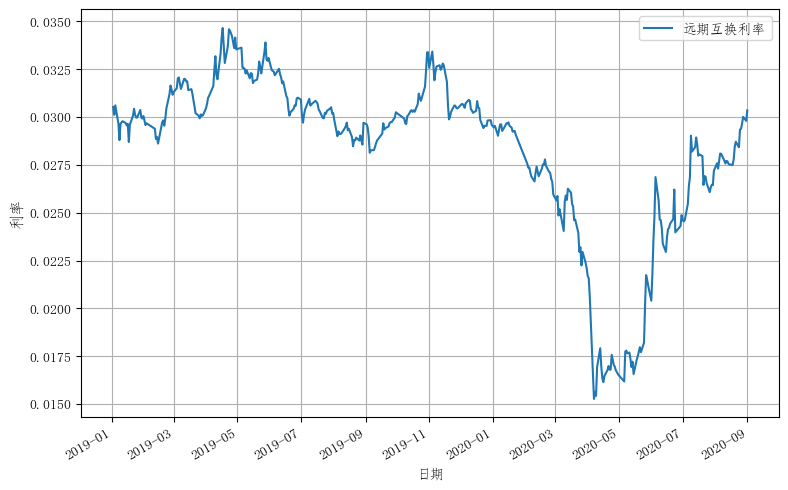

In [114]:
forward_list.plot(figsize=(9,6),grid=True)
plt.ylabel(u'利率',fontsize=11)

In [115]:
return_forward=np.log(forward_list/forward_list.shift(1)) #计算2019年1月至2020年9月1日期间远期互换利率的每日百分比变化

In [116]:
sigma_forward=np.sqrt(252)*return_forward.std()
sigma_forward=float(sigma_forward)
print('计算得到远期互换利率的年化波动率',round(sigma_forward,6))

计算得到远期互换利率的年化波动率 0.40548


C:\Users\jay\AppData\Local\Temp\ipykernel_18212\23887741.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma_forward=float(sigma_forward)


In [117]:
forward_Sep1=float(forward_list.iloc[-1])
print('2020年9月1日的远期互换利率',round(forward_Sep1,6))

2020年9月1日的远期互换利率 0.03035


C:\Users\jay\AppData\Local\Temp\ipykernel_18212\267892022.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  forward_Sep1=float(forward_list.iloc[-1])


In [118]:
par=1e8
rate_fixed=0.029

In [119]:
R_norisk=np.array(swaprate_list.iloc[-1])

In [121]:
def Rc(Rm,m):
    '''定义一个已知复利频次和对应的复利利率，计算连续复利利率的函数
    Rm:代表复利频次为m的复利利率
    m:代表复利频次'''
    r=m*np.log(1+Rm/m)
    return r

In [122]:
Rc_norisk=Rc(Rm=R_norisk,m=M)
Rc_9M_12M=Rc_norisk[1:]

In [123]:
value=swaption(L=par,Sf=forward_Sep1,Sk=rate_fixed,m=M,sigma=sigma_forward,t=T_swaption,n=T_swap,R_list=Rc_9M_12M,direction='receive')
print('2020年9月1日利率互换期权的价值',round(value,2))

2020年9月1日利率互换期权的价值 133988.26
